In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

1. Получите данные и загрузите их в рабочую среду.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/artificialflesh/training_projects/master/05_features_n_models/09_heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


2. Подготовьте датасет к обучению моделей.  
    Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
categorical_features = df.select_dtypes('object').columns
categorical_features

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [7]:
data = pd.get_dummies(df, columns=categorical_features, drop_first=True)

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [8]:
X = data.drop('HeartDisease', axis=1)

In [9]:
y = data['HeartDisease']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:  
    a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
    b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [11]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью [metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [13]:
decision_tree_pred = decision_tree.predict(X_test)

In [14]:
random_forest_pred = random_forest.predict(X_test)

In [15]:
decision_tree_metrics = classification_report(y_test, decision_tree_pred)
print(decision_tree_metrics)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [16]:
random_forest_metrics = classification_report(y_test, random_forest_pred)
print(random_forest_metrics)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [17]:
importance = pd.Series(random_forest.feature_importances_)

In [18]:
importance.index = pd.Series(X_train.columns)

In [19]:
importance = importance.sort_values(ascending=False)
importance

ST_Slope_Up          0.149099
MaxHR                0.117511
Oldpeak              0.112069
ST_Slope_Flat        0.108416
Cholesterol          0.103851
ExerciseAngina_Y     0.101613
Age                  0.088802
RestingBP            0.071584
Sex_M                0.036660
ChestPainType_ATA    0.033246
ChestPainType_NAP    0.023194
FastingBS            0.022405
RestingECG_Normal    0.015478
RestingECG_ST        0.009124
ChestPainType_TA     0.006949
dtype: float64

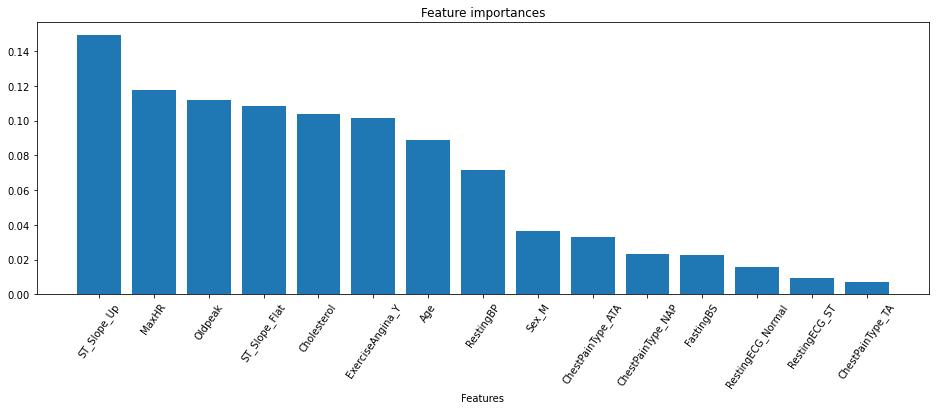

In [20]:
plt.figure(figsize=(16, 5))
plt.title('Feature importances')
plt.xlabel('Features')
plt.xticks(rotation=55)
plt.bar(importance.index, importance)
plt.show()

7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  

    a) Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью [metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [21]:
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [22]:
bagging_pred = bagging.predict(X_test)

In [23]:
bagging_metrics = classification_report(y_test, bagging_pred)
print(bagging_metrics)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).  

    a) Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью [metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [24]:
stacking = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('LinearSVC', LinearSVC(max_iter=10000, random_state=42))
    ]
)

In [25]:
stacking.fit(X_train, y_train)

C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\m3thk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

StackingClassifier(estimators=[('DecisionTree',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForest',
                                RandomForestClassifier(random_state=42)),
                               ('LinearSVC',
                                LinearSVC(max_iter=10000, random_state=42))])

In [26]:
stacking_pred = stacking.predict(X_test)

In [27]:
stacking_metrics = classification_report(y_test, stacking_pred)
print(stacking_metrics)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [28]:
print('Decision Tree Metrics:')
print(decision_tree_metrics)
print('Random Forest Metrics:')
print(random_forest_metrics)
print('Bagging Metrics:')
print(bagging_metrics)
print('Stacking Metrics:')
print(stacking_metrics)

Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Bagging Metrics:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted av

На этих данных и без изменения параметров моделей при обучении наилучший результат по всем метрикам показывает Random Forest.